In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

datos = pd.read_csv("data3.csv")
datos

,so(mm),si1(mm),si2(mm),si3(mm)
0,13.2,56.8,54.4,53.3
1,15.2,36.2,35.6,35.5
2,17.2,25.5,26.8,26.0
3,19.2,23.9,24.0,22.6
4,21.2,21.1,20.6,19.8
5,23.2,18.5,18.9,18.3
6,25.2,17.3,17.5,17.3


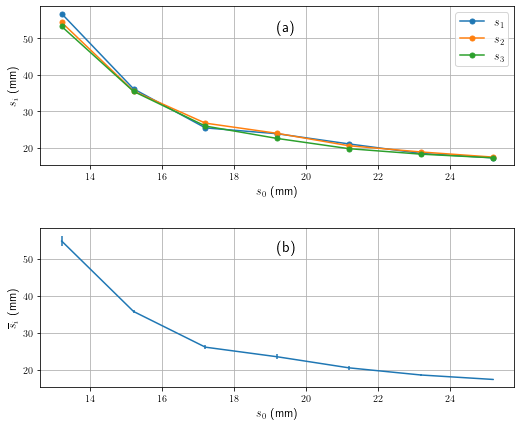

In [39]:
plt.rcParams['text.usetex']=True
fig = plt.figure(figsize=(8.5,7)) 
ax0 = fig.add_subplot(211)
ax1 = fig.add_subplot(212)
fig.subplots_adjust(hspace=0.4)

labelpos = (datos["so(mm)"][6] + datos["so(mm)"][0])/2
 

## 3.1
for ii in range (3):
    ax0.plot(datos["so(mm)"], datos[f"si{ii+1}(mm)"], 'o-', label=f"$s_{ii+1}$", \
            markersize = 5)
ax0.set_xlabel(r"$s_0$ (mm)", fontsize=12)
ax0.set_ylabel(r"$s_i$ (mm)", fontsize=12)
ax0.set_xticks(np.arange(14,26,2), fontsize=11)
ax0.set_yticks(np.arange(20,60,10), fontsize=11)
ax0.legend(fontsize=12)
ax0.grid()



## 3.2 y  3.3
averages = []
deviations = []
for ii in range (len(datos["so(mm)"])):
    aux = []
    for jj in range (1, 4):
        aux.append(datos[f"si{jj}(mm)"][ii]) 
    averages.append(np.average(aux))
    deviations.append(np.std(aux))
    
ax1.errorbar(datos["so(mm)"], averages, yerr=deviations, marker='', ls='-')
ax1.set_xticks(np.arange(14,26,2), fontsize=11)
ax1.set_yticks(np.arange(20,60,10), fontsize=11)
ax1.set_xlabel(r"$s_0$ (mm)", fontsize=12)
ax1.set_ylabel(r"$\overline{s}_i$ (mm)", fontsize=12)
ax1.grid()

ax0.text(labelpos, 52, ("(a)"),fontsize=15)
ax1.text(labelpos, 52, ("(b)"),fontsize=15)

plt.savefig("s0si.pdf")
plt.show()

In [64]:
from scipy.optimize import curve_fit

def lin(x,a1,a0):
    return x*a1+a0

x= 1/datos['so(mm)']
y = 1/np.array(averages)
y2 = y*y
Dy = deviations*y2

popt, pcov = curve_fit(lin, x, y, sigma=Dy)

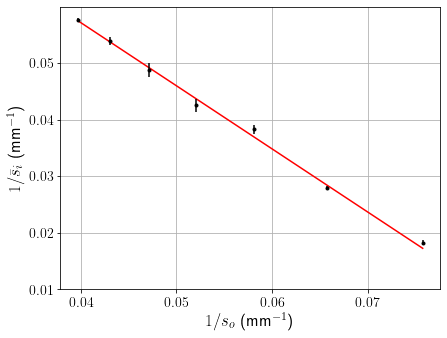

In [65]:
fig1 = plt.figure(figsize=(6.8, 5.2))
plt.plot(x, lin(x,*popt), 'r')
plt.errorbar(x, y,yerr=Dy, fmt='o', markersize=3, color='k')
plt.yticks(np.arange(0.01, 0.06,0.01), fontsize=14)
plt.xticks(np.arange(0.04, 0.08, 0.01), fontsize=14)
plt.xlabel(r'$1/s_{o}$ (mm$^{-1}$)', fontsize=17)
plt.ylabel(r'$1/\bar{s}_{i}$ (mm$^{-1}$)', fontsize=17)
plt.grid()
plt.savefig('linsosi.pdf')

In [66]:
perr = np.sqrt(np.diag(pcov))
f = 1/popt[1]
Df = perr[1]/popt[1]**2
print('a0:',popt[1], '+-', perr[1])
print('a1:',popt[0], '+-', perr[0])
print('f:', f, '+-', Df )

a0: 0.10170439819024175 +- 0.0011188431688042373
a1: -1.114739445715219 +- 0.018967267372035714
f: 9.832416471601 +- 0.10816574502030286
